It's the same as what I did  for enigma only.
But now for lorenz, enigma and typex.

# Building the distinguisher to distinguish between ciphertexts from enigma, enigma M4, typex or a fake ciphertext (which means a text not from one of these three ciphers):

# 1. Data Organization and Data Generation

In [1]:
#----cipher stuff preparation----
#enigma:
#----files for Enigma machine:----
from pyenigma import enigma, rotor

# ----Enigma machine related functions----

# Create an Enigma machine with desired rotor and reflector configurations:
'''
Enigma encryption is symmetric, which means that the same settings is used to both encrypt or decrypt a message.
In a real Enigma machine, after each letter is encrypted, the rotors move, changing the internal state, coz the rotor advances its state in one direction.
When you try to encrypt the already encrypted message, you're starting from a different rotor state, which leads to incorrect decryption.
To decrypt the message, you need to reset the rotor states to their initial positions, s.t. the Enigma is the same Enigma machine configuration, before calling the encipher method again.
If you're not resetting the machine state, encrypting the result of the first encryption will produce a different result than encrypting "Hello World" directly.
'''
#`engine` is a global variable for Enigma
engine = enigma.Enigma(
    rotor.ROTOR_Reflector_A, rotor.ROTOR_I, rotor.ROTOR_II, rotor.ROTOR_III,
    key="ABC", plugs="AV BS CG DL FU HZ IN KM OW RX"
)

def reset_enigma_machine():
    """
    Reset the state of the Enigma machine by reinitializing with the default configuration.
    """
    return enigma.Enigma(
        rotor.ROTOR_Reflector_A, rotor.ROTOR_I, rotor.ROTOR_II, rotor.ROTOR_III,
        key="ABC", plugs="AV BS CG DL FU HZ IN KM OW RX"
    )

def enigma_encrypt_or_decrypt(inputMsg):
    reset_enigma_machine() #must always reset the machine before each msg encryption/decryption
    outputMsg = engine.encipher(inputMsg) # the encryption function and the decryption function are the same   
    return outputMsg



#Enigma M4 and Typex:
#----files for Enigma M4 and TypeX machine:----
from lib.typex_machine.enigma_typex import *


# ----Enigma M4 machine related functions----
#----Set up the TypeX machine----
t_pb = ""  # Set your plugboard settings here if needed
t_rotors_4 = "TYPEX_A TYPEX_B TYPEX_C TYPEX_D"  # 4 (among 5) TypeX rotors
t_reflector = "B"  # Choose the reflector for Enigma M4
t_ring_settings = "01 01 01 01"  # Set ring settings for each rotor
t_initial_positions = "A A A A"  # Set initial positions for each rotor
#----Encryption/Decryption----
def enigmaM4_encrypt_or_decrypt(inputMsg):
    #1. change to uppercase letters (<- the curr only valid alphabets):
    inputMsg = str(inputMsg).upper() #this enigmaM4 only receives uppercase letters 
    #must always reset the machine before each msg encryption/decryption (step2.~4.):
    #2. Create a Plugboard instance
    plugboard = Plugboard([PlugLead(mapping) for mapping in t_pb.split()])
    #3. Create a MultiRotor instance for EnigmaM4
    multirotor = MultiRotor(t_rotors_4, t_reflector, t_ring_settings, t_initial_positions)
    #4. Create an EnigmaM4 instance with the MultiRotor and Plugboard
    enigmaM4 = MultiEnigma(multirotor, plugboard)

    #5. Encrypt/Decrypt the message
    outputMsg = enigmaM4.encode_decode(inputMsg)
    #Encryption/Decryption done

    #6. change to lowercase letters
    outputMsg = str(outputMsg).lower() #once done, convert to lowercase letters

    return outputMsg


# ----TypeX machine related functions----
#----Set up the TypeX machine----
t_pb = ""  # Set your plugboard settings here if needed
t_rotors = "TYPEX_A TYPEX_B TYPEX_C TYPEX_D TYPEX_E"  # 5 TypeX rotors
t_reflector = "B"  # Choose the reflector for TypeX
t_ring_settings = "01 01 01 01 01"  # Set ring settings for each rotor
t_initial_positions = "A A A A A"  # Set initial positions for each rotor
#----Encryption/Decryption----
def typex_encrypt_or_decrypt(inputMsg):
    #1. change to uppercase letters (<- the curr only valid alphabets):
    inputMsg = str(inputMsg).upper() #this typex only receives uppercase letters, I'll change it to receive A~Z and a~z. I mean: all the letters receivable by Brown Corpus.
    
    #must always reset the machine before each msg encryption/decryption (step2.~4.):
    #2. Create a Plugboard instance
    plugboard = Plugboard([PlugLead(mapping) for mapping in t_pb.split()])
    #3. Create a MultiRotor instance for TypeX
    multirotor = MultiRotor(t_rotors, t_reflector, t_ring_settings, t_initial_positions)
    #4. Create a TypeX instance with the MultiRotor and Plugboard
    typex = MultiEnigma(multirotor, plugboard)

    #5. Encrypt/Decrypt the message
    outputMsg = typex.encode_decode(inputMsg)
    #Encryption/Decryption done

    #6. change to lowercase letters
    outputMsg = str(outputMsg).lower() #once done, convert to lowercase letters

    return outputMsg

jsp si generer les correspondants bmp files est utile.

In [2]:
#---- Functions for running the txt2bmp.py script----
from txt2bmp import *
import subprocess
'''
Function to run the txt2bmp.py script with specified arguments
'''
def run_txt2bmp(arguments):
    try:
        subprocess.run(["python", "txt2bmp.py"] + arguments, check=True)
    except subprocess.CalledProcessError as e:
        print(f"Error: {e}")



'''
Convert txt files from a folder and put the converted_txt_file to the corresponding bmp files into another folder
'''
import os

def convert_and_put_bmpfile_to_folder(input_folder, output_folder, i):
    # Ensure the output folder exists, if not, create it
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    
    # List of specific file patterns to process
    specific_files = [f'pt_{i}.txt', f'ct_{i}.1.txt', f'ct_{i}.2.txt', f'ct_{i}.3.txt', f'ct_{i}.0.txt']

    # Loop only through the file that matches the specific patterns in the input folder:
    for file_name in specific_files:#os.listdir(input_folder) #<- this is for looping over the entire folder i.e. over each file of the folder `input_folder`:
        # print("file_name", file_name)
        print("for ", i)

        file_path = os.path.join(input_folder, file_name) 
        
        # Read content from the text file
        with open(file_path, 'r') as file:
            content = file.read().strip()        

        # the case for converting PT txt to bmp:
        if file_name.startswith('pt'):
            bmp_output_path = os.path.join(output_folder, f'pt_{i}.bmp')
        # the 4 cases for converting CT1 2 3 and 0 fake_CT txt to bmp:
        elif file_name.endswith('.1.txt'):
            bmp_output_path = os.path.join(output_folder, f'ct_{i}.1.bmp')
        elif file_name.endswith('.2.txt'):
            bmp_output_path = os.path.join(output_folder, f'ct_{i}.2.bmp')
        elif file_name.endswith('.3.txt'):
            bmp_output_path = os.path.join(output_folder, f'ct_{i}.3.bmp')
        elif file_name.endswith('.0.txt'):
            bmp_output_path = os.path.join(output_folder, f'ct_{i}.0.bmp')
        else:
            continue  # Skip files that don't match the specified patterns
        
        # If the file content is not empty, create a corresponding BMP file using txt2bmp.py            
        if content:
            run_txt2bmp(["-i", content, "-b", bmp_output_path])
            print(f"BMP File '{os.path.basename(bmp_output_path)}' created at '{bmp_output_path}'.")
        

In [3]:
#---- Functions for Data Generation----
import string
import secrets
def generate_random_msg(plaintext_size):
    str_a_z = string.ascii_lowercase #os.urandom(plaintext_size) #generate a string size random bytes #https://pynative.com/python-generate-random-string/#h-use-the-stringgenerator-module-to-generate-a-random-string
    random_msg=""
    for i in range(plaintext_size):
        random_char = secrets.choice(str_a_z)
        random_msg += random_char
    # random_msg generated.
    return random_msg

def write_file(msgs_to_write, folder_path, file_name_to_write):
    # cd to `folder_path`:
    file_path = f"{folder_path}\\{file_name_to_write}"
    
    # Open a file in write mode ('w')
    with open(file_path, 'w') as file:
        # Write lines to the file
        file.write(msgs_to_write)

#---- End of Functions for Data Generation----



import csv
# 1. Data Generation


#----global variables----
enigma_key = "ABC"
enigma_plugs="AV BS CG DL FU HZ IN KM OW RX"

CHARACTERS_NBRS = 100 #type int #number of characters in a string = 100

num_samples = 10000 #idea: change this hyperparam
#----global variables end----


def generate_and_write_samples_in_csv(path_to_filename, num_samples):
    # Generate rotor machine output samples
    with open(path_to_filename, mode = 'w') as csvfile:
        fieldnames = ['file_id', 'pt_txt_filename', 'tokenized_pt', 'pt_bmp_filename', 'ct_txt_filename', 'tokenized_ct','ct_bmp_filename', 'ct_label', 'key', 'plugs', 'txt_filepath', 'bmp_filepath'] # fieldnames are the column names aka features in gradient boosting algos
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames) # I must call a writer to be able to write on the csv file
        writer.writeheader() #write the header i.e. the fieldnames into the csv file
        
        #1. generate 1000 random PTs:
        for i in range(num_samples): #test for generating 10 random PTs
            #1.1. generate a random_PT and write this random_PT into the `test.csv` & Encrypt each random_PT, then store it in a matrix:    
            random_PT = generate_random_msg(CHARACTERS_NBRS)
                # Storing enigma_CT and its label (1 for enigma_CT):
            enigma_CT = enigma_encrypt_or_decrypt(random_PT)
            writer.writerow({'file_id': f'{i}.1','pt_txt_filename': f'pt_{i}.txt','tokenized_pt': random_PT, 'pt_bmp_filename': f'pt_{i}.bmp', 'ct_txt_filename': f'ct_{i}.1.txt', 'tokenized_ct': enigma_CT, 'ct_bmp_filename': f'ct_{i}.1.bmp', 'ct_label': 1, 'key': enigma_key, 'plugs': enigma_plugs, 'txt_filepath': r'data_distinguisher_rotor_enigma_typex/train/txt_files', 'bmp_filepath': r'data_distinguisher_rotor_enigma_typex/train/bmp_files'}) # Label 1 for enigma_CT
                # Storing enigmaM4_CT and its label (2 for enigmaM4_CT):
            enigmaM4_CT = enigmaM4_encrypt_or_decrypt(random_PT)
            writer.writerow({'file_id': f'{i}.2','pt_txt_filename': f'pt_{i}.txt','tokenized_pt': random_PT, 'pt_bmp_filename': f'pt_{i}.bmp', 'ct_txt_filename': f'ct_{i}.2.txt', 'tokenized_ct': enigmaM4_CT, 'ct_bmp_filename': f'ct_{i}.2.bmp', 'ct_label': 2, 'key': "", 'plugs': "", 'txt_filepath': r'data_distinguisher_rotor_enigma_typex/train/txt_files', 'bmp_filepath': r'data_distinguisher_rotor_enigma_typex/train/bmp_files'}) # Label 2 for enigmaM4_CT
                # Storing typex_CT and its label (3 for typex_CT):
            typex_CT = typex_encrypt_or_decrypt(random_PT)
            writer.writerow({'file_id': f'{i}.3','pt_txt_filename': f'pt_{i}.txt','tokenized_pt': random_PT, 'pt_bmp_filename': f'pt_{i}.bmp', 'ct_txt_filename': f'ct_{i}.3.txt', 'tokenized_ct': typex_CT, 'ct_bmp_filename': f'ct_{i}.3.bmp', 'ct_label': 3, 'key': "", 'plugs': "", 'txt_filepath': r'data_distinguisher_rotor_enigma_typex/train/txt_files', 'bmp_filepath': r'data_distinguisher_rotor_enigma_typex/train/bmp_files'}) # Label 3 for typex_CT 
            
            #1.2. Generate random data samples as fake enigma CT, then store it in the same fieldnames:
            # random_PT = generate_random_msg(CHARACTERS_NBRS)
            fake_CT = generate_random_msg(CHARACTERS_NBRS)
                    # Storing the same random_PT ⭐ this is only for train <- NAN RIEN
                    # and fake_CT and its label (0 for fake_CT)
            writer.writerow({'file_id': f'{i}.0','pt_txt_filename': f'pt_{i}.txt','tokenized_pt': random_PT, 'pt_bmp_filename': f'pt_{i}.bmp', 'ct_txt_filename': f'ct_{i}.0.txt', 'tokenized_ct': fake_CT, 'ct_bmp_filename': f'ct_{i}.0.bmp', 'ct_label': 0, 'key': "", 'plugs': "", 'txt_filepath': r'data_distinguisher_rotor_enigma_typex/train/txt_files', 'bmp_filepath': r'data_distinguisher_rotor_enigma_typex/train/bmp_files'}) # Label 0 for fake_CT
            
            #1.3 Write each created txt into a file:
            write_file(random_PT, r'data_distinguisher_rotor_enigma_typex/train/txt_files', f'pt_{i}.txt')
            write_file(enigma_CT, r'data_distinguisher_rotor_enigma_typex/train/txt_files', f'ct_{i}.1.txt')
            write_file(enigmaM4_CT, r'data_distinguisher_rotor_enigma_typex/train/txt_files', f'ct_{i}.2.txt')
            write_file(typex_CT, r'data_distinguisher_rotor_enigma_typex/train/txt_files', f'ct_{i}.3.txt')   
            write_file(fake_CT, r'data_distinguisher_rotor_enigma_typex/train/txt_files', f'ct_{i}.0.txt')
    

Q: In "Here's an example of how this metadata might look in a CSV file's Text_File and Image_File represent the names of the text and image files respectively." it's better to store immediately each `Text_File`'s content in the csv or just store the `Text_File`'s name?

A: Considerations for Your Scenario:
Given your task of distinguishing between different types of ciphertexts and fake ones, storing only the Text_File name in the CSV (along with relevant metadata) might be more practical. You can access the actual text content when needed during feature extraction or model training.

For text data processing, you'd read the Text_File names from the CSV and then load the corresponding text files to extract features or preprocess the text data separately within your code.

This approach keeps the CSV file leaner and maintains a clear separation between metadata and data content, providing flexibility when working with text content without increasing the size or complexity of the CSV file unnecessarily.

For the below code: run it if I wanna generate a new dataset and write it into the csv file.\
If I wanna use the same dataset as before, don't run the code below.

In [4]:
#generate and writesamples in that csv file by calling the function:
path_to_filename_train = 'data_distinguisher\catboost_PIL_rotor_enigma_typex_train.csv'
path_to_filename_test = 'data_distinguisher\catboost_PIL_rotor_enigma_typex_test.csv'
num_samples = 10000 #idea: change this hyperparam

#I'm commenting out calling this function, coz I don't want to use new dataset but the same dataset.
generate_and_write_samples_in_csv(path_to_filename_train, num_samples)

# generate_and_write_samples_in_csv(path_to_filename_test, num_samples)
#todo: then randomnize the order of each row in `generate_and_write_samples_in_csv(path_to_filename_test` coz for testing!
#todo: for `generate_and_write_samples_in_csv(path_to_filename_test`: later when testing: just give PTs and CTs. 

For the code below: run it for reading either the entire dataset or the first [:???] in the csv file

In [5]:
#Check if coherent result & correctly written in that csv file after calling function
import pandas as pd
df = pd.read_csv(path_to_filename_train) #read the entire csv file
# df = pd.read_csv(path_to_filename_train)[:500] #read the first 500 rows of the csv file

display(df.iloc[:20]) #has a better than print(df).head(20))
print(df.shape) #(4000, 12) when num_samples=1000 && read the entire csv file

,file_id,pt_txt_filename,tokenized_pt,pt_bmp_filename,ct_txt_filename,tokenized_ct,ct_bmp_filename,ct_label,key,plugs,txt_filepath,bmp_filepath
0,0.1,pt_0.txt,xwxzmuqbgjojomarrvderyarptuwvqtylzftinzlkoswwv...,pt_0.bmp,ct_0.1.txt,yiinxdctutfvrnruizccfiwzoyckpubjipxatexspqgykx...,ct_0.1.bmp,1,ABC,AV BS CG DL FU HZ IN KM OW RX,data_distinguisher_rotor_enigma_typex/train/tx...,data_distinguisher_rotor_enigma_typex/train/bm...
1,0.2,pt_0.txt,xwxzmuqbgjojomarrvderyarptuwvqtylzftinzlkoswwv...,pt_0.bmp,ct_0.2.txt,vjayqqkfulxwzkgogzbdwlkxknrqjsiajxcymhrywxlcmf...,ct_0.2.bmp,2,NaN,NaN,data_distinguisher_rotor_enigma_typex/train/tx...,data_distinguisher_rotor_enigma_typex/train/bm...
2,0.3,pt_0.txt,xwxzmuqbgjojomarrvderyarptuwvqtylzftinzlkoswwv...,pt_0.bmp,ct_0.3.txt,elzlatjcefqivgxtchyxxiepecihlhoitqoujrlfvgwktl...,ct_0.3.bmp,3,NaN,NaN,data_distinguisher_rotor_enigma_typex/train/tx...,data_distinguisher_rotor_enigma_typex/train/bm...
3,0.0,pt_0.txt,xwxzmuqbgjojomarrvderyarptuwvqtylzftinzlkoswwv...,pt_0.bmp,ct_0.0.txt,abtgogvixjsgfsfdgyjtilygvzssbeswavfihlmngvkbec...,ct_0.0.bmp,0,NaN,NaN,data_distinguisher_rotor_enigma_typex/train/tx...,data_distinguisher_rotor_enigma_typex/train/bm...
4,1.1,pt_1.txt,nfacbmzxxhoqdmrrmdhdwfozcmvznqkdjzsjmjtwyhsuni...,pt_1.bmp,ct_1.1.txt,tbthyckplzfglnauhpultvirkwtmuumxgptfulqnmxgouh...,ct_1.1.bmp,1,ABC,AV BS CG DL FU HZ IN KM OW RX,data_distinguisher_rotor_enigma_typex/train/tx...,data_distinguisher_rotor_enigma_typex/train/bm...
5,1.2,pt_1.txt,nfacbmzxxhoqdmrrmdhdwfozcmvznqkdjzsjmjtwyhsuni...,pt_1.bmp,ct_1.2.txt,spxxafvnwrxfykcoomferkxfesxvcschlxqkigpbsflllh...,ct_1.2.bmp,2,NaN,NaN,data_distinguisher_rotor_enigma_typex/train/tx...,data_distinguisher_rotor_enigma_typex/train/bm...
6,1.3,pt_1.txt,nfacbmzxxhoqdmrrmdhdwfozcmvznqkdjzsjmjtwyhsuni...,pt_1.bmp,ct_1.3.txt,gzdguskvwsqhygdtacmtslunagrtphfubqykvefkzrwykf...,ct_1.3.bmp,3,NaN,NaN,data_distinguisher_rotor_enigma_typex/train/tx...,data_distinguisher_rotor_enigma_typex/train/bm...
7,1.0,pt_1.txt,nfacbmzxxhoqdmrrmdhdwfozcmvznqkdjzsjmjtwyhsuni...,pt_1.bmp,ct_1.0.txt,hbwtxpuslnsypldghycsoaegyxanjfhbrndyjlrfmiymbg...,ct_1.0.bmp,0,NaN,NaN,data_distinguisher_rotor_enigma_typex/train/tx...,data_distinguisher_rotor_enigma_typex/train/bm...
8,2.1,pt_2.txt,yggyzmyrrwmmxcghumuqhmvmcinrwwzquafkwjlytmxazm...,pt_2.bmp,ct_2.1.txt,xemevcozorbspykybxhvbdllknddlpabpjxxllapccvqak...,ct_2.1.bmp,1,ABC,AV BS CG DL FU HZ IN KM OW RX,data_distinguisher_rotor_enigma_typex/train/tx...,data_distinguisher_rotor_enigma_typex/train/bm...
9,2.2,pt_2.txt,yggyzmyrrwmmxcghumuqhmvmcinrwwzquafkwjlytmxazm...,pt_2.bmp,ct_2.2.txt,kitzcfmwqxvriiamvdihenlqeltkpegvyicjjgolgifikw...,ct_2.2.bmp,2,NaN,NaN,data_distinguisher_rotor_enigma_typex/train/tx...,data_distinguisher_rotor_enigma_typex/train/bm...


(40000, 12)


# 2. Model Training using catboost

In [6]:
import catboost as catb

#1. Data Preparation: Declare feature vector and target variable:

fieldnames = ['file_id', 'pt_txt_filename', 'tokenized_pt', 'pt_bmp_filename', 'ct_txt_filename', 'tokenized_ct','ct_bmp_filename', 'ct_label', 'key', 'plugs', 'txt_filepath', 'bmp_filepath'] # fieldnames are the column names aka features in gradient boosting algos

X = df[['tokenized_pt', 'tokenized_ct']] #feature vector
y = df["ct_label"] #target variable

display(X.iloc[:20]) #has a better than print(df).head(20))
display(y.iloc[:20]) #has a better than print(df).head(20))
# print(X)
# print(y)

,tokenized_pt,tokenized_ct
0,xwxzmuqbgjojomarrvderyarptuwvqtylzftinzlkoswwv...,yiinxdctutfvrnruizccfiwzoyckpubjipxatexspqgykx...
1,xwxzmuqbgjojomarrvderyarptuwvqtylzftinzlkoswwv...,vjayqqkfulxwzkgogzbdwlkxknrqjsiajxcymhrywxlcmf...
2,xwxzmuqbgjojomarrvderyarptuwvqtylzftinzlkoswwv...,elzlatjcefqivgxtchyxxiepecihlhoitqoujrlfvgwktl...
3,xwxzmuqbgjojomarrvderyarptuwvqtylzftinzlkoswwv...,abtgogvixjsgfsfdgyjtilygvzssbeswavfihlmngvkbec...
4,nfacbmzxxhoqdmrrmdhdwfozcmvznqkdjzsjmjtwyhsuni...,tbthyckplzfglnauhpultvirkwtmuumxgptfulqnmxgouh...
5,nfacbmzxxhoqdmrrmdhdwfozcmvznqkdjzsjmjtwyhsuni...,spxxafvnwrxfykcoomferkxfesxvcschlxqkigpbsflllh...
6,nfacbmzxxhoqdmrrmdhdwfozcmvznqkdjzsjmjtwyhsuni...,gzdguskvwsqhygdtacmtslunagrtphfubqykvefkzrwykf...
7,nfacbmzxxhoqdmrrmdhdwfozcmvznqkdjzsjmjtwyhsuni...,hbwtxpuslnsypldghycsoaegyxanjfhbrndyjlrfmiymbg...
8,yggyzmyrrwmmxcghumuqhmvmcinrwwzquafkwjlytmxazm...,xemevcozorbspykybxhvbdllknddlpabpjxxllapccvqak...
9,yggyzmyrrwmmxcghumuqhmvmcinrwwzquafkwjlytmxazm...,kitzcfmwqxvriiamvdihenlqeltkpegvyicjjgolgifikw...


0     1
1     2
2     3
3     0
4     1
5     2
6     3
7     0
8     1
9     2
10    3
11    0
12    1
13    2
14    3
15    0
16    1
17    2
18    3
19    0
Name: ct_label, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split

#2. declare categorical features:
cat_features = list(range(0, X.shape[1])) #[0, 1] coz X.shape[1] = 2
    #2 features: the columns "tokenized_pt" and "tokenized_ct" are the features:
    # "tokenized_pt" is feature0, "tokenized_ct" is feature1

#3. Split data into train and validation set 
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=True) #shuffle the dataset each time, so don't pick the same split dataset each time 
# ⚠ set `random_state=None`, coz if set it other than None, then each time I run the model, I'll always produce the same results across a different run: `random_state=42` is the same as `random_state=0`, just set at a value ≥ 0
# `random_state=None` means I'll always produce different results across each different run.
X_val, X_test, y_val, y_test =  train_test_split(X_val, y_val, test_size=0.5, shuffle=True) 
# So now train:test:val = 0.8 : 0.1 : 0.1

print(y_val.shape, y_test.shape, y_train.shape)
#4. create a catboostClassifier:
nb_of_iterations = 500 #idea change the hyperparam from 10 to 100. See how Result when 1000 (a fixed nb of) iterations
clf = catb.CatBoostClassifier(
    iterations=nb_of_iterations, 
    learning_rate=0.05, 
    #loss_function='CrossEntropy'
)

#5. train the training dataset's data:
clf.fit(X_train, y_train, 
        cat_features=cat_features, 
        eval_set=(X_val, y_val), 
        verbose=False
)


print('CatBoost model is fitted: ' + str(clf.is_fitted()))
print('CatBoost model parameters:')
print(clf.get_params())



#6. Stdout of the training
from catboost import CatBoostClassifier
clf = CatBoostClassifier(
    iterations=nb_of_iterations,
)

# use eval_set, coz eval_set always pick the best set among train, test and val set, to train and test the model.
clf.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_val, y_val),
)


#7.  Model predictions
# print(X_val) 
print("model predict proba for all the classes =", clf.predict_proba(X=X_val))

y_test_prediction = clf.predict(data=X_test)
print("model class prediction =", y_test_prediction)
for i in range(len(y_test_prediction)):
    print("y_test_prediction[i] =", y_test_prediction[i])


#the custom_loss outputs the train and test accuracy **of the loss**

#7. plot the graph
clf = CatBoostClassifier(
    iterations=nb_of_iterations,
    random_seed=42,
    learning_rate=0.05,
    custom_loss=['AUC', 'Accuracy'] 
)

#plot the logloss
clf.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_val, y_val),
    verbose=False,
    plot=True
)

(4000,) (4000,) (32000,)
CatBoost model is fitted: True
CatBoost model parameters:
{'iterations': 700, 'learning_rate': 0.05}
Learning rate set to 0.132618
0:	learn: 1.2995205	test: 1.1554855	best: 1.1554855 (0)	total: 67.5ms	remaining: 47.1s
1:	learn: 1.2400705	test: 1.0097999	best: 1.0097999 (1)	total: 122ms	remaining: 42.7s
2:	learn: 1.1960498	test: 0.9034553	best: 0.9034553 (2)	total: 189ms	remaining: 43.8s
3:	learn: 1.1592569	test: 0.8239330	best: 0.8239330 (3)	total: 243ms	remaining: 42.2s
4:	learn: 1.1283820	test: 0.7569405	best: 0.7569405 (4)	total: 290ms	remaining: 40.3s
5:	learn: 1.1038587	test: 0.7074800	best: 0.7074800 (5)	total: 347ms	remaining: 40.2s
6:	learn: 1.0831015	test: 0.6661957	best: 0.6661957 (6)	total: 409ms	remaining: 40.5s
7:	learn: 1.0653268	test: 0.6310945	best: 0.6310945 (7)	total: 473ms	remaining: 40.9s
8:	learn: 1.0512021	test: 0.5985969	best: 0.5985969 (8)	total: 537ms	remaining: 41.3s
9:	learn: 1.0389603	test: 0.5713649	best: 0.5713649 (9)	total: 592ms	

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [23]:
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error


# Evaluate model performance
'''
accuracy_train = accuracy_score(y_train, y_train_predictions) #`y_train` contains the groundtruth_labels
#todo: what's y_train_predictions?
print("Train set Accuracy:", accuracy_train)
print()
confusion_matrix = confusion_matrix(y_train, y_train_predictions)
print("Train set Confusion matrix:", confusion_matrix)
'''

accuracy_test = accuracy_score(y_test,  y_test_prediction)
print("Test set Accuracy:", accuracy_test)
print()
confusion_matrix = confusion_matrix(y_test, y_test_prediction)
print("Test set Confusion matrix:", confusion_matrix)



Test set Accuracy: 0.73775

Test set Confusion matrix: [[736 165  70   0]
 [  0 679 209 124]
 [115   0 875   0]
 [129  35 202 661]]


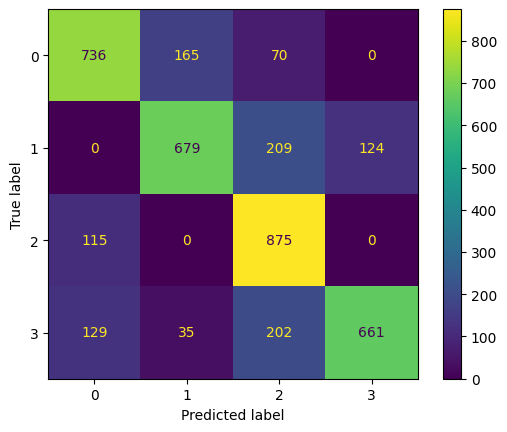

In [26]:
from sklearn.metrics import ConfusionMatrixDisplay

display_cm = ConfusionMatrixDisplay(confusion_matrix, display_labels=clf.classes_)
display_cm.plot()


The following [confusion matrix](https://youtu.be/gkNccYwtAbU?si=usqOEQduOJNN-KVK) is the Conclusion for the model ` catboost_distinguisher_rotor_enigma_typex.ipynb` (cf rotor enigma enigmaM4 typex machine distinguisher model report.docx):

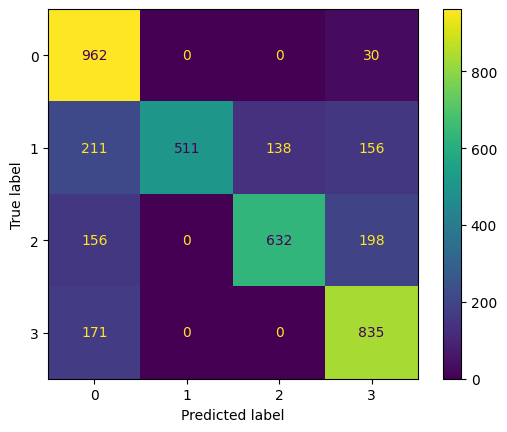

In [29]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Your confusion matrix
conf_matrix = np.array([[962, 0, 0, 30],
                        [211, 511, 138, 156],
                        [156, 0, 632, 198],
                        [171, 0, 0, 835]])

# Create ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.arange(4))

# Display confusion matrix
fig, ax = plt.subplots()
# fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax)
plt.show()


Compute the  TP, TN, FP, FN, the accuracy, precision, recall, and F1 score for each label\
And compute the Macro F1 Score and the Weighted F1 Score:

In [57]:
# Given confusion matrix
conf_matrix = [
    [962, 0, 0, 30],
    [211, 511, 138, 156],
    [156, 0, 632, 198],
    [171, 0, 0, 835]
]

# Initialize lists to store accuracy, precision, recall, and F1 score for each class
f1_list = []

# Calculate the TP, TN, FP, FN, the accuracy, precision, recall, and F1 score for each class
for i in range(len(conf_matrix)):
    TP = conf_matrix[i][i]
    FN = sum(conf_matrix[i]) - TP
    FP = sum(conf_matrix[j][i] for j in range(len(conf_matrix))) - TP
    TN = sum(sum(row) for row in conf_matrix) - TP - FN - FP

    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
    
    f1_list.append(f1)


    print(f"Class {i}: TP={TP}, TN={TN}, FP={FP}, FN={FN} Accuracy = {accuracy:.4f} Precision = {precision:.4f}, Recall = {recall:.4f}, F1 Score = {f1:.4f}")


# Compute Macro F1 Score
macro_f1 = sum(f1_list) / len(f1_list)

# Compute Weighted F1 Score
weighted_f1 = sum(f1_list[i] * sum(conf_matrix[i]) / np.sum(conf_matrix) for i in range(len(f1_list)))

print(f"Macro F1 Score: {macro_f1:.4f}")
print(f"Weighted F1 Score: {weighted_f1:.4f}")

Class 0: TP=962, TN=2470, FP=538, FN=30 Accuracy = 0.8580 Precision = 0.6413, Recall = 0.9698, F1 Score = 0.7721
Class 1: TP=511, TN=2984, FP=0, FN=505 Accuracy = 0.8738 Precision = 1.0000, Recall = 0.5030, F1 Score = 0.6693
Class 2: TP=632, TN=2876, FP=138, FN=354 Accuracy = 0.8770 Precision = 0.8208, Recall = 0.6410, F1 Score = 0.7198
Class 3: TP=835, TN=2610, FP=384, FN=171 Accuracy = 0.8612 Precision = 0.6850, Recall = 0.8300, F1 Score = 0.7506
Macro F1 Score: 0.7279
Weighted F1 Score: 0.7277


class0 = fake_CT\
class1 = enigma_CT\
class2 = enigmaM4_CT\
class3 = typex_CT

The weighted F1 score is computed by taking the weighted average of the F1 scores for each class. The weights are determined by the proportion of true instances for each class in the dataset.

The formula for the weighted F1 score can be represented as:

$$
\text{Weighted F1 Score} = \sum_{i=1}^{n} \left(\frac{\text{Number of True Instances of Class } i}{\text{Total Number of Instances}} \times \text{F1 Score of Class } i\right)
$$

Here's a breakdown of the formula:
- $n$ represents the number of classes.
- $\text{Number of True Instances of Class } i$ is the sum of true positives and true negatives for class $i$.
- $\text{Total Number of Instances}$ is the sum of all true positives, true negatives, false positives, and false negatives in the dataset.
- $\text{F1 Score of Class } i$ is the F1 score calculated for class $i$.

In simpler terms, it's the weighted average of F1 scores, where each class's F1 score is weighted by its prevalence in the dataset (the proportion of true instances for that class).